In [15]:
# Multiple horizons MTM analysis
# include("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/analysis_fixtures.jl")
# include("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/analysis_visuals.jl")

include("C:\\Users\\Federico\\Documents\\GitHub\\pysical_locomotion\\analysis\\behavior\\analysis_fixtures.jl")
include("C:\\Users\\Federico\\Documents\\GitHub\\pysical_locomotion\\analysis\\behavior\\analysis_visuals.jl")

import jcontrol as jc
using Printf
import jcontrol: Track
using NPZ

@Info (Main):  Loaded 1021 trials 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:19:56 
@Warn (nothing):  Assignment to `x` in soft scope is ambiguous because a global 
  │                   variable by the same name exists: `x` will be treated as a 
  │                   new local. Disambiguate by using `local x` to suppress this 
  │                   warning or `global x` to assign to the existing global variable. 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:19:57 
@Warn (nothing):  Assignment to `y` in soft scope is ambiguous because a global 
  │                   variable by the same name exists: `y` will be treated as a 
  │                   new local. Disambiguate by using `local y` to suppress this 
  │                   warning or `global y` to assign to the existing global variable. 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 0

  Activating project at `C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\behavior`


# Track creators
Code to create various kinds of tracks for simulations with MCM to crate a dataset for RNN.

visually inspect hairpinwith constant width

In [103]:
if Sys.iswindows()
    BASE_FLD = "C:\\Users\\Federico\\Documents\\GitHub\\pysical_locomotion\\analysis\\RNN\\tracks"
else
    BASE_FLD = "/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/RNN/tracks"
end


function showtrack(npyfile; ms=4)
    track = Track(; start_waypoint=4, npyfile=npyfile, const_width=true, track_length=nothing)
    plt = plot(; aspect_ratio=:equal)
    # scatter!(track.X[1:400:end], track.Y[1:400:end], marker_z=track.S[1:400:end], label=nothing, ms=ms)
    # plot(tra)
    draw!(track, alpha=1)
    plot!(; title="$(round(track.S[end]; digits=2))cm")
    plt
end


function reversetrack(npyfile)
    xy = npzread(npyfile)
    xy = reverse(xy, dims=1)

    destfile = replace(npyfile, ".npy"=>"_reversed.npy")
    npzwrite(destfile, xy)
    return destfile
end

function create_track(x, y, name; with_reverse=true)
    xy = hcat(x, y)
    l = (Int64 ∘ round)(sum(sqrt.(diff(x).^2 .+ diff(y).^2))) * 2

    destfile = joinpath(BASE_FLD, "$name.npy")
    npzwrite(destfile, xy)

    if with_reverse
        reverse_npyfile = reversetrack(destfile)
    else
        reverse_npyfile = ""
    end
    return destfile, reverse_npyfile, l
end


create_track (generic function with 1 method)

## Hairpin

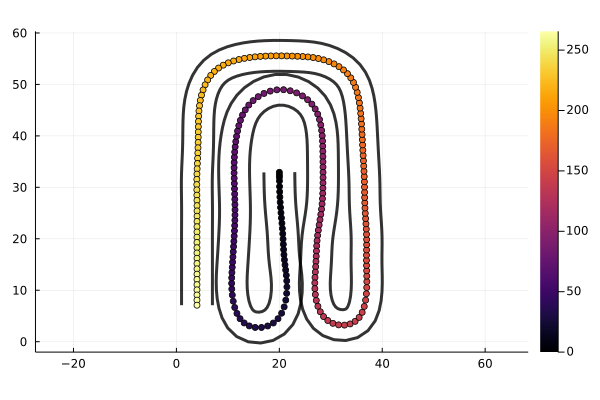

In [30]:
npyfile = joinpath(BASE_FLD, "hairpin.npy")
showtrack(npyfile)

save haripin reversed

@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\hairpin_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:22:56 


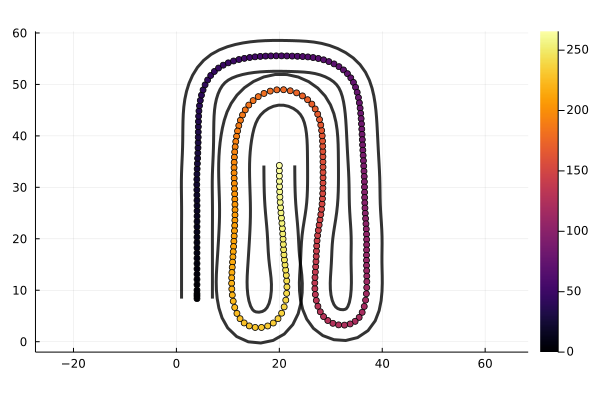

In [31]:
reverse_npyfile = reversetrack(npyfile)
showtrack(reverse_npyfile)

## Circle arena

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\circle.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:23:22 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\circle_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:23:22 


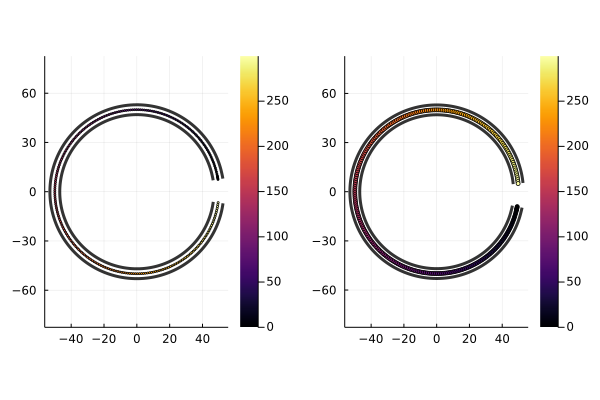

In [34]:
p = 0:.05:2π
x = cos.(p) .* 50
y = sin.(p) .* 50
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "circle")
p1 = showtrack(destfile; ms=2)
p2 = showtrack(reverse_npyfile; ms=3)
plot(p1, p2)

## Sine track

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\sine.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:23:26 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\sine_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:23:26 


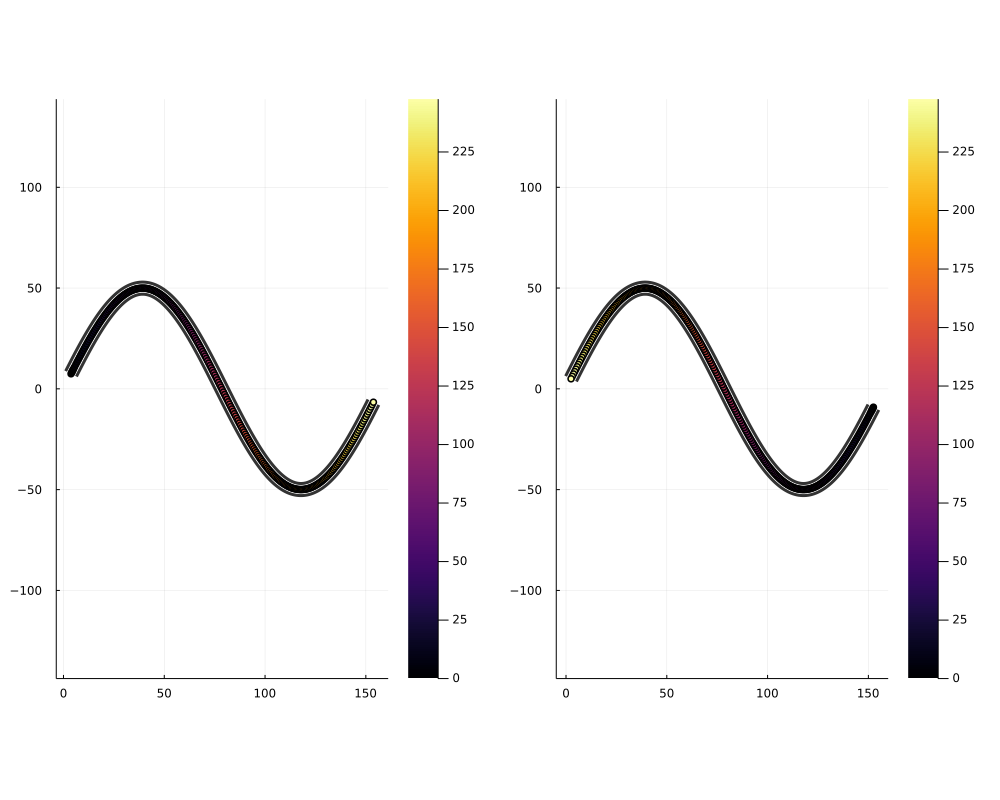

In [35]:
p = 0:.05:2π
x = p * 25
y = sin.(p) .* 50
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "sine")
p1 = showtrack(destfile; ms=4)
p2 = showtrack(reverse_npyfile; ms=4)
plot(p1, p2; size=(1000, 800))

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\sine_chirp.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:24:26 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\sine_chirp_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:24:26 


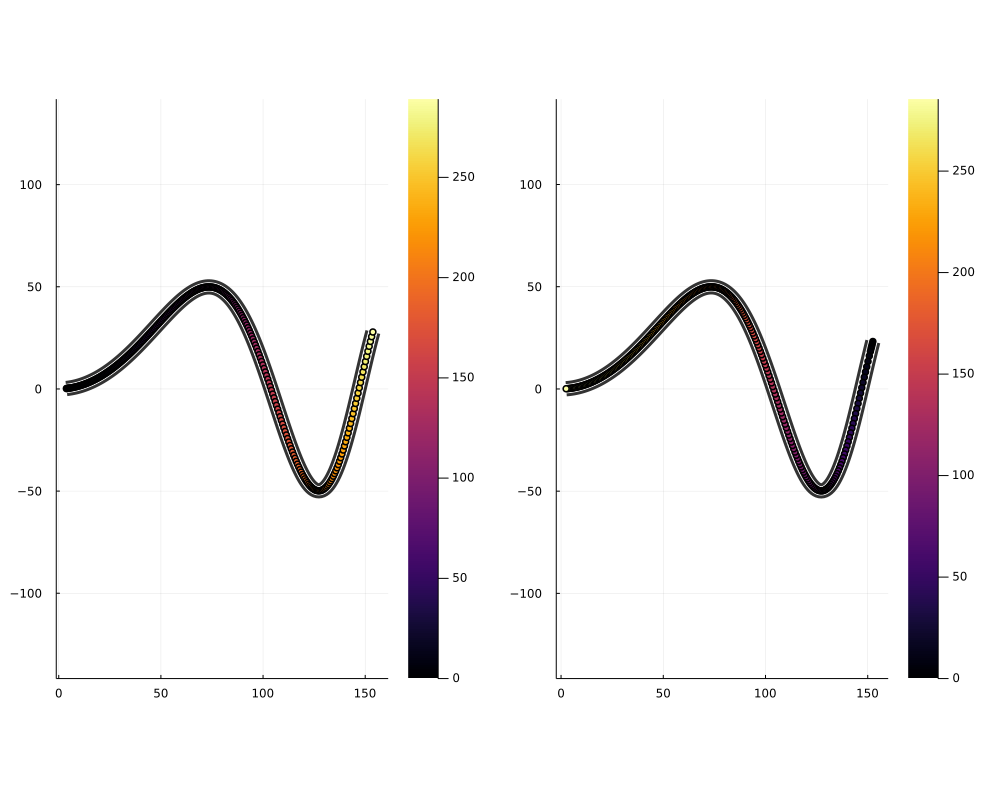

In [43]:
p = 0:.05:2π
x = p * 25
y = sin.(p .* (p ./ 5.5)) .* 50
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "sine_chirp")
p1 = showtrack(destfile; ms=4)
p2 = showtrack(reverse_npyfile; ms=4)
plot(p1, p2; size=(1000, 800))

## Cosine

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\cosine.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:23:52 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\cosine_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:23:52 


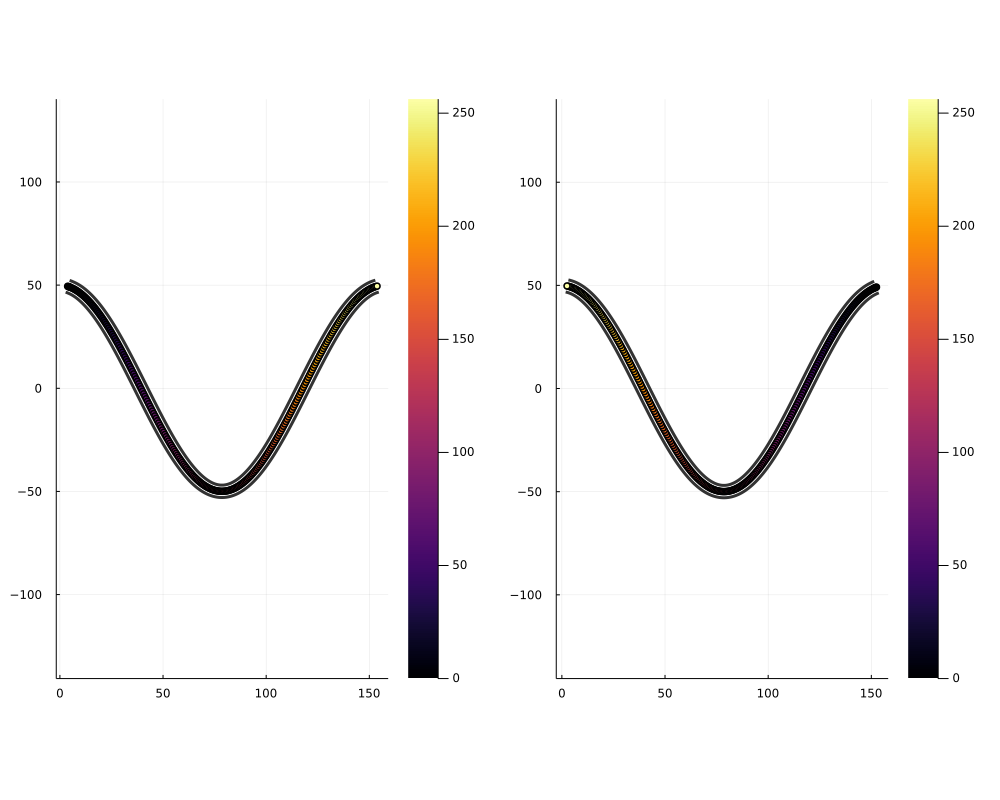

In [39]:
p = 0:.05:2π
x = p * 25
y = cos.(p) .* 50
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "cosine")
p1 = showtrack(destfile; ms=4)
p2 = showtrack(reverse_npyfile; ms=4)
plot(p1, p2; size=(1000, 800))

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\cosine_chirp.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:24:17 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\cosine_chirp_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:24:17 


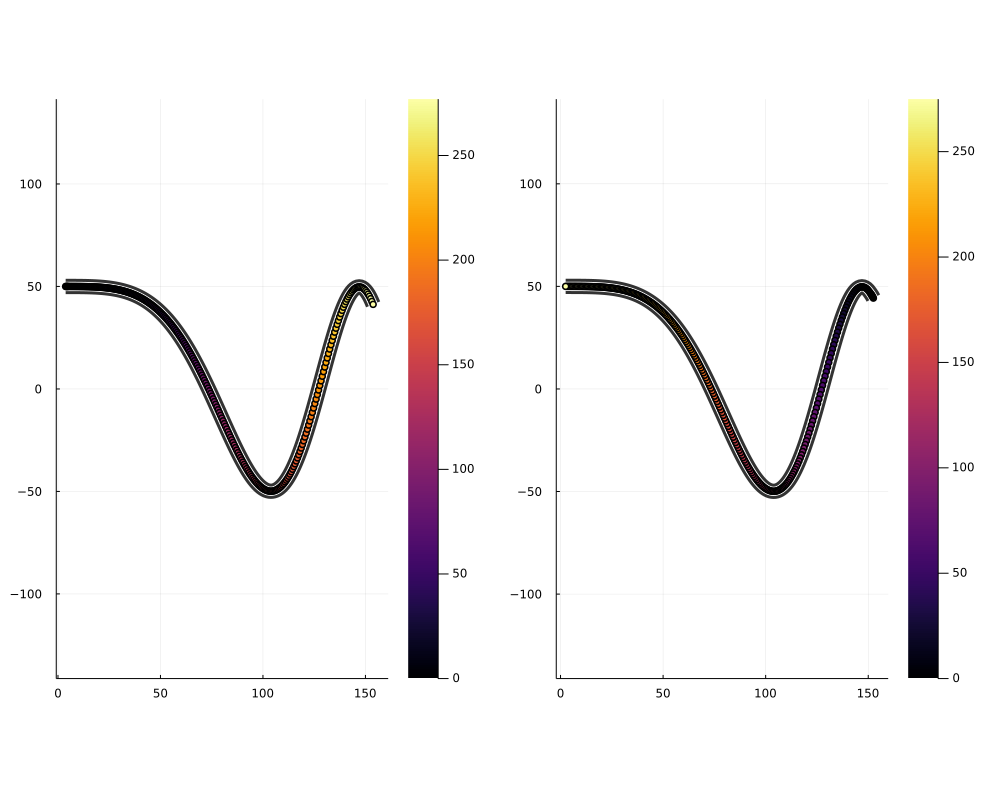

In [42]:
p = 0:.05:2π
x = p * 25
y = cos.(p .* (p ./ 5.5)) .* 50
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "cosine_chirp")
p1 = showtrack(destfile; ms=4)
p2 = showtrack(reverse_npyfile; ms=4)
plot(p1, p2; size=(1000, 800))

## Double curve

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\double_curve.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:24:37 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\double_curve_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:24:37 


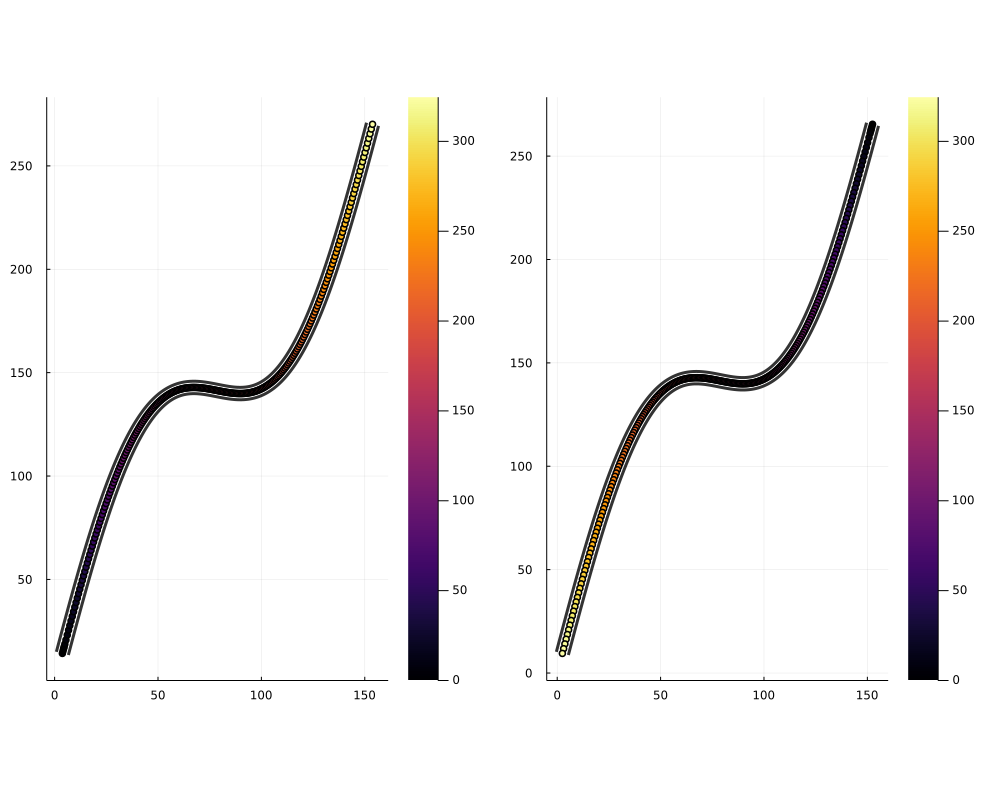

In [44]:
p = 0:.05:2π
x = p * 25
y = sin.(p) .* 50 .+ p * 45
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "double_curve")
p1 = showtrack(destfile)
p2 = showtrack(reverse_npyfile)
plot(p1, p2; size=(1000, 800))

## Squiggle

@Info (Main.create_track):  Saving track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\squiggle.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:24:42 
@Info (Main.reversetrack):  Saving reversed track at 
  │ 
  │ (String)  ▶  destfile = C:\Users\Federico\Documents\GitHub\pysical_locomotion\analysis\RNN\tracks\squiggle_reversed.npy 
  ╰──────────────────────────────────────────────── 
                      Fri, 27 May 2022 09:24:42 


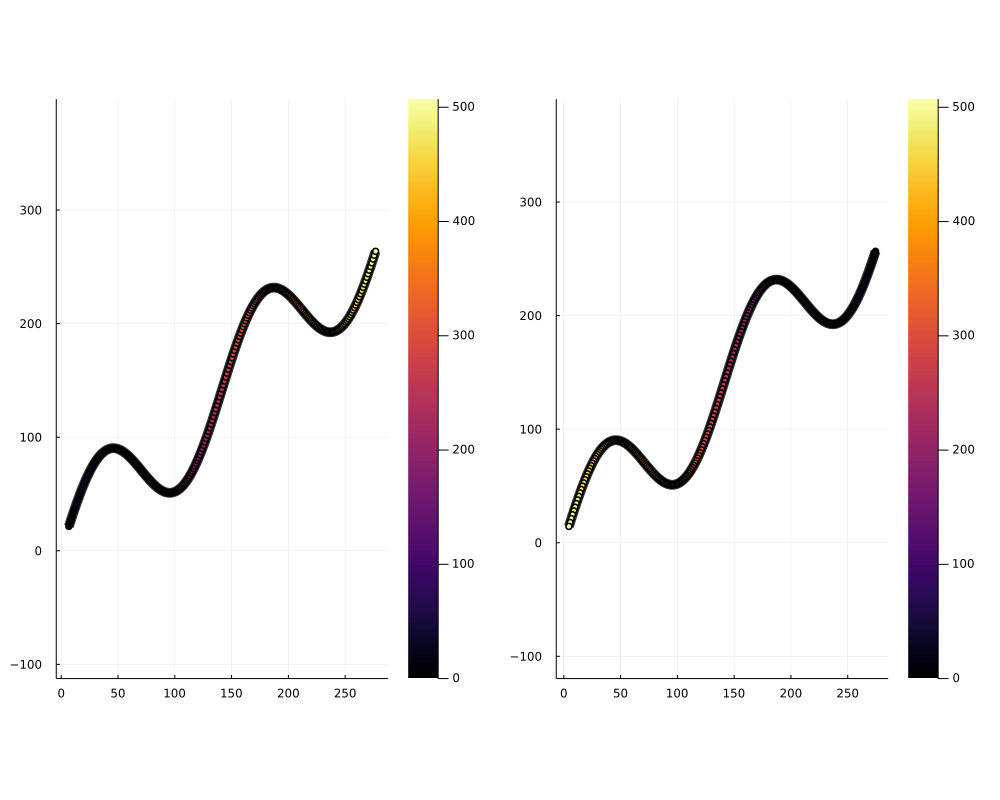

In [45]:
p = 0:.05:2π
x = p * 45
y = sin.(p .* 2) .* 50 .+ p * 45
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "squiggle")
p1 = showtrack(destfile)
p2 = showtrack(reverse_npyfile)
plot(p1, p2; size=(1000, 800))

## U turn

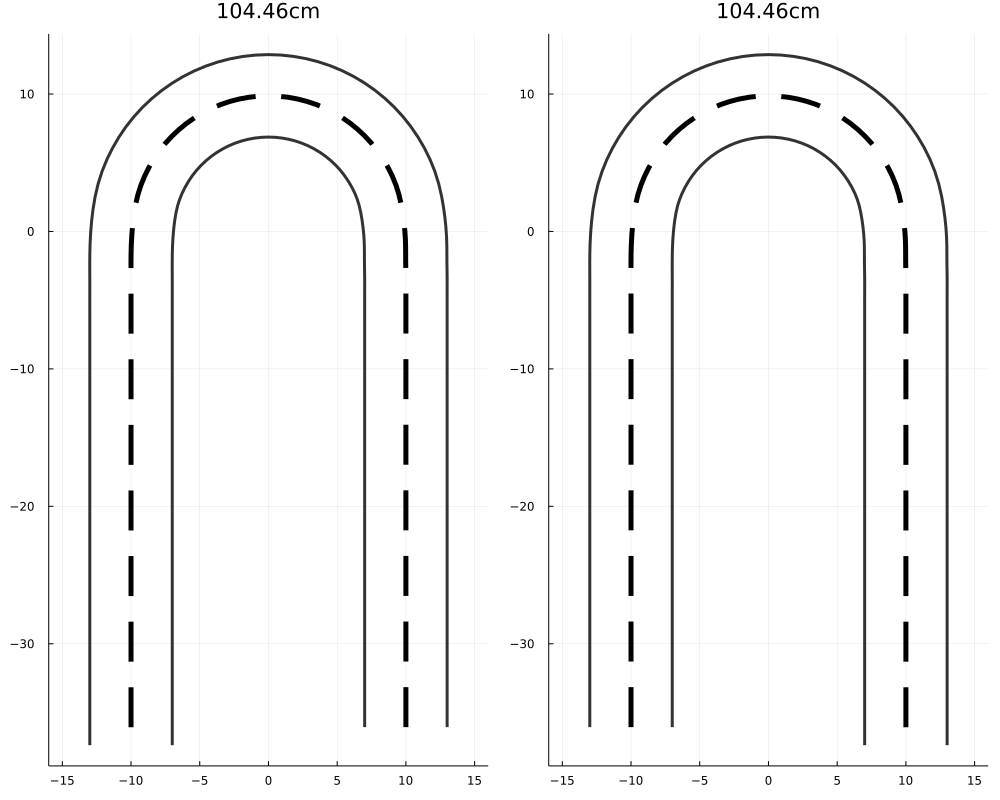

In [105]:
p = (-.1):.2:(π+.10)


x1 = ones(30) * 10
y1 = range(-40, stop=-2, length=30)

x2 = cos.(p) * 10
y2 = sin.(p) * 10

x3 = ones(30) * -10
y3 = range(-2, stop=-40, length=30)


x = vcat(x1, x2, x3)
y = vcat(y1, y2, y3)
xy = hcat(x, y)

destfile, reverse_npyfile, l = create_track(x, y, "uturn")
p1 = showtrack(destfile; ms=4)
p2 = showtrack(reverse_npyfile; ms=4)
plot(p1, p2; size=(1000, 800))

##  F1 race tracks
Tracks adapted from: https://github.com/TUMFTM/racetrack-database

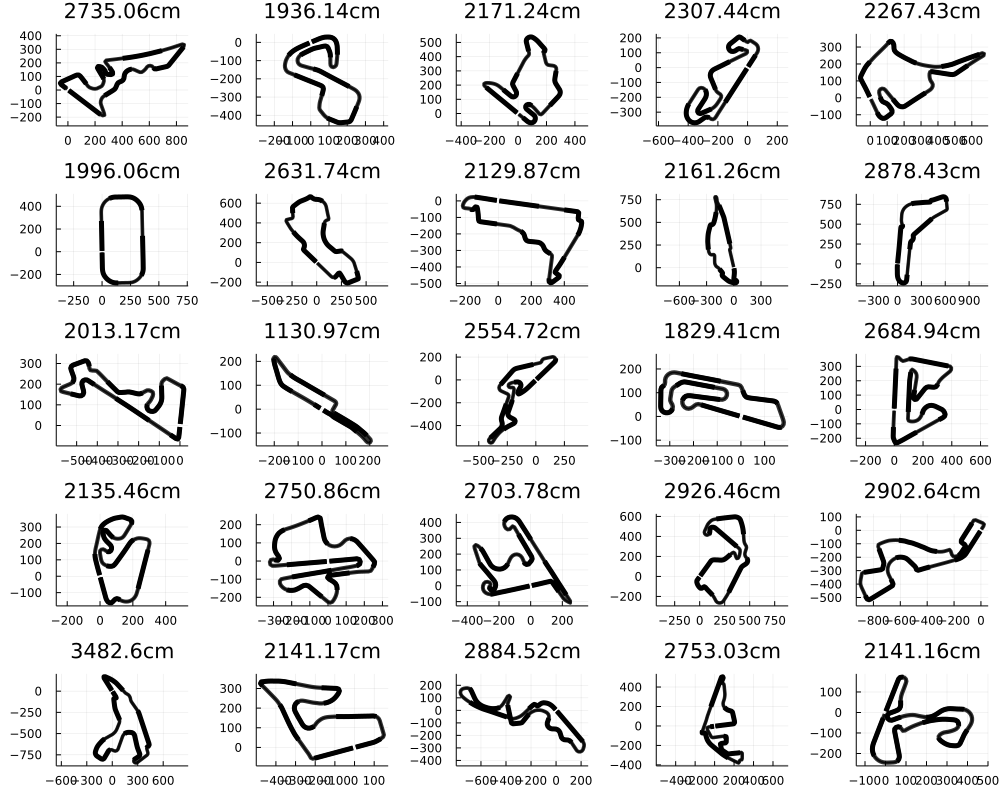

In [104]:
function partition(x, n)
    N = length(x)
    part_len = (Int64 ∘ floor)(N / n)
    _x = map(i -> x[(part_len * (i-1) + 1):(i * part_len)], 1:n)
end

plots = []

for f in glob("*.csv", joinpath(BASE_FLD, "f1_tracks"))
    cname = splitpath(f)[end][1:end-4]
    circuit = CSV.File(f)
    x = circuit[Symbol("# x_m")] ./ 2
    y = circuit[:y_m] ./ 2

    destfile, reverse_npyfile, l = create_track(x, y, "F1_$(cname)"; with_reverse=false)
    p1 = showtrack(destfile; ms=1)
    plot!(; cbar=false)
    push!(plots, p1)
    # break
end

plot(plots...; size=(1000, 800))